# Домашнее задание 2

#### С использованием библиотек Numpy и Pandas написать программу реализующую:

   1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
   2.  Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
   3.  Подсчет длин предложений и их количества.
   4.  Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
   5. Построение гистограммы частоты встречаемости слов.

   В вачестве критерия схожести была выбрана полная уникальность слов, то есть алгоритмы кластеризации данных в данном решении не применялись.
    Текстовым файлом для анализа стал рассказ О.Генри "Деловые люди" (фай "Genri_BP_UNI.txt" прилагается).

In [77]:
import pandas as pd
import numpy as np
from re import sub

In [78]:
with open('Genri_BP_UNI.txt', 'rt', encoding='utf-8') as file:
    text = file.read()

# =========== нормализация исходного текста

# убираем переводы строк
text = text.replace('\n', ' ')

# убираем примечания в квадратных скобках
text = sub(r'\[.+?\]', '', text)

# только точки в качестве разделителя предложений
text = sub(r'[!?]', '.', text)

# убираем точки из косвенной речи и вводных предложений в скобках
text = sub(r'\(.+?\)', lambda t: t.group().replace(".", ""), text)
text = sub(r'".+?"', lambda t: t.group().replace(".", ""), text)

# убираем все остальные знаки припинания
text = sub(r'[^\w.]', ' ', text)

# убираем однобуквенные "предложения" (инициалы)
text = sub(r'\b((\w)\.\s+)', '\\2', text)

# убираем повторяющиеся пробелы и точки
while '  ' in text:
    text = text.replace('  ', ' ')
while '..' in text:
    text = text.replace('..', '.')

# убираем "мусор" в начале и конце текста и преобразуем к нижнему регистру
text = text.strip().lower()


# =========== обработка

# разбиваем на предложения и удаляем пустые элементы
sentences = list(filter(None, map(lambda s: s.strip(), text.split('.'))))
# for s in sentences:
#     print(s)

# считаем длины в символах
s_lengths = list(map(lambda s: len(s), sentences))
# считаем длины в словах
sw_lengths = list(map(lambda s: len(s.split()), sentences))

#print("Количество предложений:", len(sentences))
#print("Длины предложений (символов):", sorted(s_lengths, reverse=True))
#print("Длины предложений (слов):", sorted(sw_lengths, reverse=True))


# разбиваем на слова
words = text.replace('.', ' ').split()

# можем убрать предлоги, но тогда будут удалены и местоимения
# words = list(filter(lambda w: len(w) > 2, words))
#print(len(words))

# считаем слова по критерию полного совпадения
word_counts = {}
for word in words:
    word_counts[word] = word_counts.get(word, 0) + 1

sorted_words = sorted(word_counts.items(), key=lambda w: w[1], reverse=True)
#print(sorted_words)


In [79]:
# используем возможности модуля pandas для обработки и визуализации полученных результатов
#sentences_df =  pd.DataFrame((sentences, s_lengths, sw_lengths), columns=['Предложения', 'Длина предложения в символах', 'Длина предложения в словах'])
sentences_Se = pd.Series(sentences)
s_lengths_Se = pd.Series(s_lengths)
sw_lengths_Se = pd.Series(sw_lengths)
df = pd.DataFrame({'Предложения' : sentences_Se, 'Количество_слов': sw_lengths_Se, 'Количество_символов' : s_lengths_Se })
word_counts_Se = pd.Series(word_counts)
df2 = pd.DataFrame(word_counts_Se)
df2.rename(columns = {0 : 'Частота_встречаемости'}, inplace = True)

In [80]:
df.head()

,Предложения,Количество_слов,Количество_символов
0,о,1,1
1,генри деловые люди вы конечно сами все знаете ...,13,70
2,вы задевали живых актеров локтями на улицах а ...,15,80
3,вы читали критику на них в газетах и видели в ...,18,111
4,если свести воедино ваши представления о таинс...,23,174


In [81]:
df2.head()

,Частота_встречаемости
о,9
генри,2
деловые,2
люди,3
вы,14


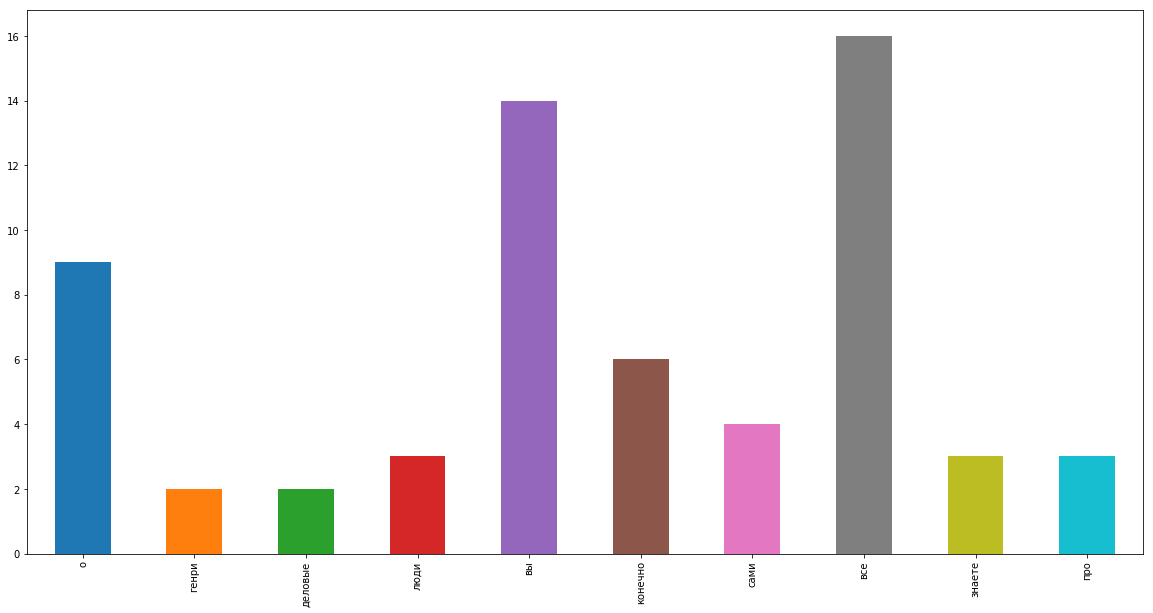

In [83]:
# график, предсталяющий частоту встречаемости первых 10 слов из датафрейма
df2.Частота_встречаемости.head(10).plot(figsize = (20, 10), kind = 'bar')